In [1]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
sns.set_style('whitegrid')

In [2]:
# I made steps to anonymize this data.
# Though, if you have any reservations - please let me know and I will remove your entry.
participants = pd.read_csv("pdwc2018_anonym.csv", parse_dates=['Order Date', 'Check-In Date'])

In [3]:
participants.head()

,Attendee Status,Order Date,Check-In Date,Would you like a T-Shirt?,What size?,Gender,GenderP,Participant Type,Call Type,Country,City
0,Checked In,2018-08-08 09:22:33,2018-11-19 10:15:00,Yes,Unisex XL,male,1.0,Individual,Early Bird,United States,New York
1,Checked In,2018-08-08 20:52:01,2018-11-19 09:57:00,Yes,Unisex Medium,male,1.0,Individual,Early Bird,Poland,Warsaw
2,Checked In,2018-08-09 11:03:00,2018-11-19 09:22:00,Yes,Unisex Medium,female,1.0,Corporate,Early Bird,Unknown Location,NaN
3,Checked In,2018-08-09 11:03:00,2018-11-19 12:08:00,Yes,Unisex Small,female,1.0,Corporate,Early Bird,Unknown Location,NaN
4,Checked In,2018-08-09 11:03:00,2018-11-19 11:32:00,Yes,Unisex Large,male,1.0,Corporate,Early Bird,Unknown Location,NaN


In [4]:
len(participants)

435

In [5]:
# percent of people who showed up
100 * (participants['Attendee Status'] == "Checked In").mean()

94.25287356321839

In [6]:
participants['Country'].value_counts()

Poland              284
Germany              24
Unknown Location     17
United Kingdom       15
Netherlands          12
Denmark              10
Czech Republic        7
France                7
Italy                 7
Lithuania             6
United States         6
Malta                 5
Norway                5
Greece                4
Switzerland           4
Portugal              4
Ukraine               3
Sweden                3
Latvia                2
Spain                 2
Ireland               2
Russia                1
Austria               1
Belgium               1
Serbia                1
Seychelles            1
Nigeria               1
Name: Country, dtype: int64

In [7]:
# Poland 2017 was: 332 / 415 = 0.8
# Poland 2018 is: 0.65
participants['Country'].value_counts()['Poland'] / len(participants)

0.6528735632183909

In [8]:
(participants['Country'].value_counts()['Poland'] + 17) / len(participants)

0.6919540229885057

In [9]:
participants.loc[lambda df: df['Country'] == "Poland"]['City'].value_counts().head(10)

Warsaw            163
Krakow             17
Poznan             14
Wrocław            14
Białystok          13
Gliwice            11
Katowice            5
Szczecin            3
Bytom               3
Boguszów-Gorce      3
Name: City, dtype: int64

In [10]:
# Warsaw
163 / 435

0.37471264367816093

In [11]:
participants.loc[lambda df: df['Country'] != "Poland"]['City'].value_counts().head(10)

Copenhagen      7
Düsseldorf      7
Vilnius         6
Leidschendam    5
Valletta        5
Oslo            5
Amsterdam       5
Paris           4
London          4
Athens          4
Name: City, dtype: int64

In [12]:
# total number of countries
len(participants['Country'].value_counts())

27

In [13]:
# total number of cities
len(participants['City'].value_counts())

98

In [14]:

participants['Gender'].value_counts()

male      325
female     93
Name: Gender, dtype: int64

In [34]:
# percent of women (heuristics, from names)
# TODO: compare with 2017
100 * (participants['Gender'].value_counts()['female'] / len(participants))

21.379310344827587

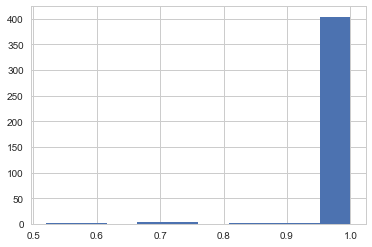

In [16]:
participants['GenderP'].hist()

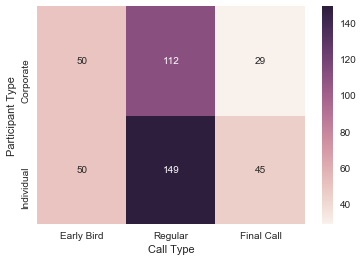

In [17]:
ticket_types = pd.pivot_table(participants, index='Participant Type',
                               columns='Call Type', values='Attendee Status', aggfunc=len)
ticket_types = ticket_types.loc[:, ['Early Bird', 'Regular', 'Final Call']]
sns.heatmap(ticket_types, annot=True, fmt="d")

/Users/pmigdal/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0.5,1,'Ticket types at PyData Warsaw 2018')

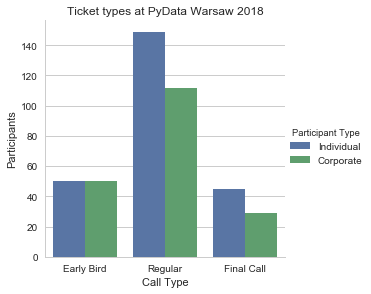

In [18]:
sns.factorplot(data=participants, x="Call Type", hue="Participant Type", kind="count", size=4)
plt.ylabel("Participants")
plt.title("Ticket types at PyData Warsaw 2018")

In [19]:
# percent of people wanting a t-shirt
100 * (participants['Would you like a T-Shirt?'] == "Yes").mean()

83.9080459770115

In [20]:
tshirts = participants["What size?"].dropna().apply(lambda x: x.replace("Unisex ", "")).value_counts()
tshirts

Medium             125
Large              116
XL                  48
Small               47
XXL                 12
X-Small             12
Large | XL           3
Small | Medium       2
Medium | Large       2
X-Small | Small      1
Small | Large        1
Name: What size?, dtype: int64

Text(0,0.5,'Participants')

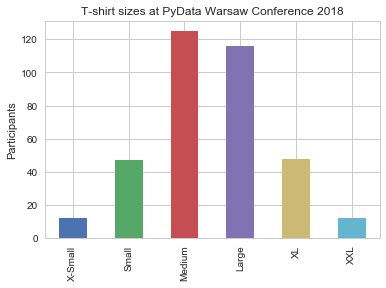

In [21]:
tshirts.loc[['X-Small', 'Small', 'Medium', 'Large', 'XL', 'XXL']].plot(kind='bar')
plt.title("T-shirt sizes at PyData Warsaw Conference 2018")
plt.ylabel("Participants")

## Was

https://www.eventbrite.com/e/pydata-warsaw-2017-tickets-34889678969#

* Early Bird ticket pricing (1 June - 16 July)
  * Individual: 199.00 zł
  * Corporate: 399.00 zł
* Regular ticket pricing (17 July - 30 September)
  * Individual: 299.00 zł
  * Corporate: 599.00 zł
* Final call ticket pricing (1 - 19 October)
  * Individual: 399.00 zł
  * Corporate: 799.00 zł

## Is

https://www.eventbrite.com/e/pydata-warsaw-2018-tickets-48182209285#

* Early Bird ticket pricing (2 August - 31 August)
  * Individual: 300.00 zł
  * Corporate: 600.00 zł
* Regular ticket pricing (1 September - 31 October)
  * Individual: 400.00 zł
  * Corporate: 750.00 zł
* Final call ticket pricing (1 November - 18 November)
  * Individual: 500.00 zł
  * Corporate: 950.00 zł

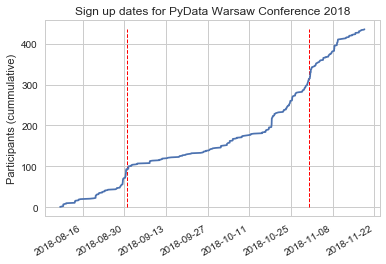

In [22]:
order_dates = participants["Order Date"].sort_values()
pd.Series(range(1, len(order_dates) + 1), index=order_dates).plot()
plt.title("Sign up dates for PyData Warsaw Conference 2018")
plt.xlabel("")
plt.ylabel("Participants (cummulative)")
plt.vlines(pd.Timestamp(datetime.date(2018, 8, 31)), 0, 435,
           linestyles='--', colors='r', linewidth=1)
plt.vlines(pd.Timestamp(datetime.date(2018, 10, 31)), 0, 435,
           linestyles='--', colors='r', linewidth=1)
# plt.text(pd.Timestamp(datetime.date(2017, 6, 24)), 400, "early bid")

In [23]:
def ymd_to_days_before(y, m, d):
    return -(pd.Timestamp(datetime.date(y, m, d)) - pd.Timestamp(datetime.date(2018, 11, 19))).total_seconds() / (60**2 * 24)

Text(0,0.5,'Participants (cumulative)')

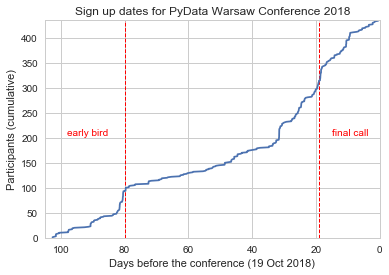

In [24]:
y_max = len(participants)
order_dates = participants["Order Date"].sort_values()
days_to = order_dates.apply(lambda x: -(x - pd.Timestamp(datetime.date(2018, 11, 19))).total_seconds() / (60**2 * 24)) 
pd.Series(range(1, len(order_dates) + 1), index=days_to).plot(xlim=(105, 0))

plt.vlines(ymd_to_days_before(2018, 8, 31), 0, y_max,
           linestyles='--', colors='r', linewidth=1)
plt.vlines(ymd_to_days_before(2018, 10, 31), 0, y_max,
           linestyles='--', colors='r', linewidth=1)
plt.text(98, 205, "early bird", color='r')
plt.text(15, 205, "final call", color='r')
# plt.text(ymd_to_days_before(2017, 7, 1), -15, "JUL")
# plt.text(ymd_to_days_before(2017, 8, 1), -15, "AUG")
# plt.text(ymd_to_days_before(2017, 9, 1), -15, "SEPT")
# plt.text(ymd_to_days_before(2017, 10, 1), -15, "OCT")

plt.ylim([0, y_max])
plt.title("Sign up dates for PyData Warsaw Conference 2018")
plt.xlabel("Days before the conference (19 Oct 2018)")
plt.ylabel("Participants (cumulative)")

Text(0,0.5,'Participants')

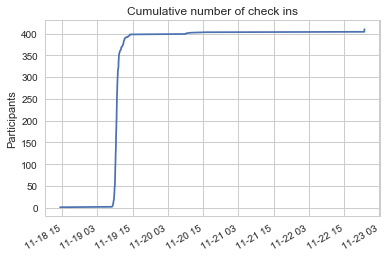

In [25]:
# warning: some people arrived earlier but registered later
checkin_dates = participants["Check-In Date"].dropna().sort_values()
pd.Series(range(1, len(checkin_dates) + 1), index=checkin_dates).plot()
plt.title("Cumulative number of check ins")
plt.xlabel("")
plt.ylabel("Participants")

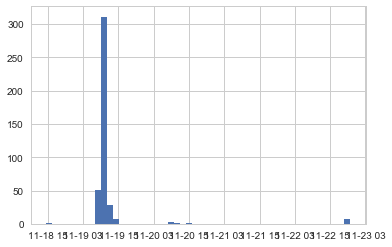

In [26]:
checkin_dates.hist(bins=50)

In [27]:
checkin19 = checkin_dates.loc[checkin_dates.apply(lambda x: x.day == 19)]


Text(0,0.5,'Participants')

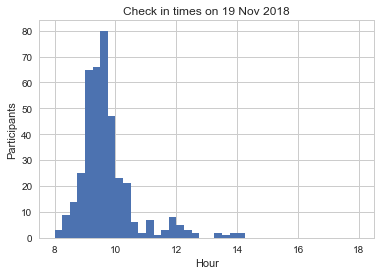

In [28]:
checkin19.apply(lambda x: x.hour + x.minute/60).hist(range=(8, 18), bins=40)
plt.title("Check in times on 19 Nov 2018")
plt.xlabel("Hour")
plt.ylabel("Participants")

In [29]:
times = participants.loc[checkin19.index, ["Order Date", "Check-In Date"]]

In [30]:
times_secs = times.applymap(lambda x: (x - pd.Timestamp(datetime.date(2017, 10, 19))).total_seconds()) 

In [31]:
times_secs.corr()

,Order Date,Check-In Date
Order Date,1.000000,0.064705
Check-In Date,0.064705,1.000000


In [32]:
#participants["Job Title"].value_counts().head(20)

In [33]:
#from collections import Counter
#words = Counter()
#for index, title in participants["Job Title"].items():
#    words.update(title.lower().split())
#words.most_common(20)

## To do

* some other fields (underrepresented, free tickets (organizers and stuff), newsletter)
* comparison with 2017